In [11]:
%matplotlib inline
import os
import math 
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

sns.set_style('white')

ahba_dir     = '/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/AUG27/AHBA'
#ahba_dir     = '/scr/malta3/workspace/project_iron/AHBA'
save_fig_dir = '/Users/kanaan/Google Drive/TS-EUROTRAIN/Papers/2016_QSM_paper/Figures_python_v2'

In [12]:
##################################################################################################
# Genesets 
##################################################################################################

GS_IRON_D = ['THRSP', 'TF', 'MAL', 'KLK6', 'HOMER1', 'MOBP', 'APOD', 'MOG', 'CRYAB', 'APOC1', 'CA2', 'RASGRP1', 
          'STMN4', 'LYZ','GSTM1', 'CTSS',  'DCK' ]
GS_IRON   = ['FTH1','FTL' ,'HFE','HFE2','IL1A', 'IL6', 'IL6R','IREB2','SLC40A1','TF','TFR2','TNF',]
GS_DA     = ['COMT', 'DDC', 'MAOA', 'MAOB', 'NQO1', 'PPP2CA', 'PPP2CB', 'PRKACA', 'PRKACB','PRKACG', 'TH', 'TYR']
GS_DA_receptor_bind = ['GNA13', 'DLG4', 'DNM1', 'DNM2','DRD1', 'DRD3','GNA12','GNAS',  'ARRB2', 'ATP1A3', 'PALM', 
                    'CLIC6', 'PTPN11', 'PPP1R1B', 'DNAJC14', 'CAV2', 'SLC9A3R1']
GS_DA_receptor_sig  = ['ADCY5', 'ADCY6', 'ARRB2', 'CALY','DRD1', 'DRD2', 'DRD3', 'DRD4', 'DRD5', 'FLNA', 
                   'GNA11', 'GNA14', 'GNA15', 'GNAI3', 'GNAL', 'GNAO1', 'GNAQ', 'GNAS', 'GNB1', 'GNG2', 
                   'GPR21', 'GPR52', 'GSK3A', 'GSK3B', 'HMP19', 'KLF16', 'OPRM1', 'RGS9', 'SLC9A3R1']
GS_DA_transport     = ['CHRM5','DRD1','PARK2','PARK7','SLC18A2','SLC22A1','SLC22A2','SLC22A3', 'SLC6A2',
                    'SLC6A3','SNCA']
GS_DA_transmission  = ['CDK5','CRH','CRHBP','DRD1','DRD2','DRD3','DRD4','DRD5','RASD2','TH']
GS_ANMC = ['ME1', 'ALDH5A1', 'GBE1', 'GALM', 'PYGL', 'CPS1','PFKFB3', 'PYGB', 'IDH2', 'ENO1','PPP1R1A', 
        'MDH2', 'CS','PYGM', 'PGM3', 'PHKG1', 'SLC3A2', 'PFKFB4', 'KHK','LDHB', 'PCK2','SLC2A8',  'PGM2', 
        'GPT','AKR1B1', 'NANS', 'PDK4','OGDHL','DHTKD1', 'PFKM', 'PGM1', 'PC','AGL']
GS_GLU  = ['UNC13B', 'RIMS1', 'GLS2', 'GLS', 'SLC38A2', 'SLC17A7', 'RAB3A', 'SLC1A1', 'SLC1A6', 'SLC1A7', 
        'SNAP25', 'STX1A', 'STXBP1','VAMP2', 'SYT1' ]
GS_GABA = ['GPHN', 'GABARAP','DNM1', 'GABRA1', 'GABRA2', 'GABRA3', 'GABRA4','GABRA5','GABRA6''SRC'] 
GS_GABA_GLU = GS_GLU + GS_GABA
GS_TF       = ['TF']
GS_FTH      = ['FTH1']
GS_FTL      = ['FTL']
GS_HRE      = ['HFE']
GS_HRE2     = ['HFE2']
GS_SLC25    = ['SLC25A37']
GS_SLC40    = ['SLC40A1']
GS_BIOBANK  = GS_TF + GS_FTH + GS_HRE + GS_SLC25


In [13]:
# Read Geneset expression values

def return_expression_df(geneset):
    return pd.read_csv(os.path.join(ahba_dir, 'AHBA_%s.csv'%geneset),index_col=0)

IRON             = return_expression_df('IRON')
IRON_D           = return_expression_df('IRON_D')
DA_met           = return_expression_df('DA_metabolism')
DA_jellen        = return_expression_df('DA_jellen')
DA_jellen2       = return_expression_df('DA_jellen2')
DA_receptor_bind = return_expression_df('DA_receptor')
DA_receptor_sig  = return_expression_df('DA_receptor_sig')
DA_transmission  = return_expression_df('DA_tranmission')
DA_transport     = return_expression_df('DA_transport')
ANMC             = return_expression_df('ANMC')
GLU              = return_expression_df('GLU')
GABA             = return_expression_df('GABA')
GLU_GABA         = return_expression_df('GLU_GABA')
TF               = return_expression_df('TF')
FTH              = return_expression_df('FTH')
FTL              = return_expression_df('FTL')
HRE              = return_expression_df('HRE')
HRE2             = return_expression_df('HRE2')
SLC25            = return_expression_df('SLC25')
#SLC40            = return_expression_df('SLC40')
BIOBANK          = return_expression_df('BIOBANK')
HOUSEKEEPING     = return_expression_df('HOUSEKEEPING') 


In [14]:
def concat_dfs(measure):
    df  = pd.DataFrame(index = IRON.index, 
                        columns = ['IRON', 'IRON_D', 'DA_met', 'DA_receptor_bind', 'DA_receptor_sig', 
                                   'DA_transmission', 'DA_transport', 'ANMC', 'GLU', 'GABA', 'GLU_GABA', 
                                   'TF', 'FTH', 'FTL', 'HRE', 'HRE2', 'SLC25', 'SLC40', 'BIOBANK'
                                   'top_struct', 'struct'])
    xval = 100
    df['top_struct']        = IRON.top_struct
    df['struct']            = IRON.struct_name
    df['IRON']              = IRON[measure] * xval
    df['IRON_D']            = IRON_D[measure] * xval
    df['DA_met']            = DA_met[measure] * xval
    df['DA_jellen']         = DA_jellen[measure] * xval
    df['DA_jellen2']        = DA_jellen2[measure] * xval
    df['DA_receptor_bind']  = DA_receptor_bind[measure] * xval
    df['DA_receptor_sig']   = DA_receptor_sig[measure] * xval
    df['DA_transmission']   = DA_transmission[measure] * xval
    df['DA_transport']      = DA_transport[measure] * xval
    df['ANMC']              = ANMC[measure] * xval
    df['GLU']               = GLU[measure] * xval
    df['GABA']              = GABA[measure] * xval
    df['GLU_GABA']          = GLU_GABA[measure] * xval
    df['TF']                = TF[measure] * xval
    df['FTH']               = FTH[measure] * xval
    df['FTL']               = FTL[measure] * xval
    df['HRE']               = HRE[measure] * xval
    df['HRE2']              = HRE2[measure] * xval
    df['SLC25']             = SLC25[measure] * xval
    #df['SLC40']             = SLC40[measure] * xval
    df['BIOBANK']           = BIOBANK[measure] * xval
    df['HOUSEKEEPING']      = HOUSEKEEPING[measure] * xval
    return df

df_PC = concat_dfs('PC1')
df_MU  = concat_dfs('Mean')

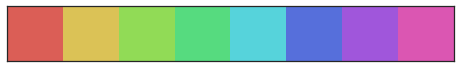

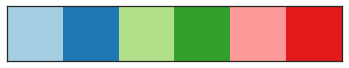

In [15]:
def plot_geneset_correlations(df, met1,met2, cmap, annotate, label, fname):
    grid = sns.JointGrid(met1, met2, data=df) 
    grid.plot_marginals(sns.distplot, color = cmap,hist=False, kde = True, rug = 0, kde_kws={'shade':True})  
    grid.plot_joint(sns.regplot, fit_reg=1, scatter= 1, color = cmap, 
                    line_kws={'linestyle': '-', 'lw':2.5}, scatter_kws={"s": 25})

    formula = [ '%s ~ %s'%(met1
                           ,met2)][0]
    model   = smf.ols(formula=formula, data= df)
    result = model.fit() 
    p_val  = result.pvalues[1]
    pcor   = math.copysign(np.round(np.sqrt(result.rsquared), 3) , result.params[1])
    
    #xy = (0.015,0.019)
    #xy = (1.2,2.0)
    if annotate:
        plt.annotate('R=%s, P=%s' %(pcor, p_val), xy = annotate, fontsize = 13,  color='r')
    #grid.set_axis_labels()
    
    if label:
        plt.xlabel(label[0], fontsize = 15, weight = 'bold')
        plt.ylabel(label[1], fontsize = 15, weight = 'bold')
        
    plt.xticks(fontsize=12, weight='bold')
    plt.yticks(fontsize=12, weight='bold')
    
    if fname:
        plt.savefig(os.path.join(save_fig_dir, fname), dpi = 500, bbox_inches='tight', transparent = 1, )
    return result

sns.palplot(sns.color_palette("hls", 8))
sns.palplot(sns.color_palette("Paired"))

blue = sns.color_palette("Paired")[1]
green = sns.color_palette("Paired")[3]
red = sns.color_palette("Paired")[5]
purp = sns.color_palette("hls", 8)[6]
purp2 = sns.color_palette("hls", 8)[7]

# Whole Brain - PC1 calculated across all-genes all-probes 

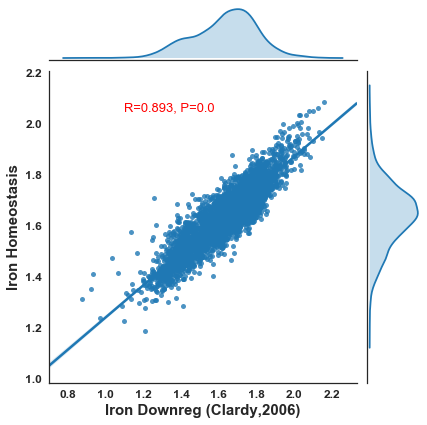

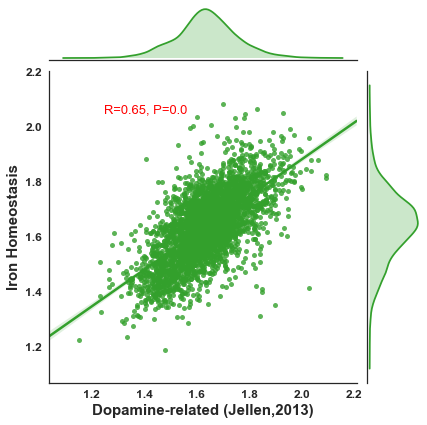

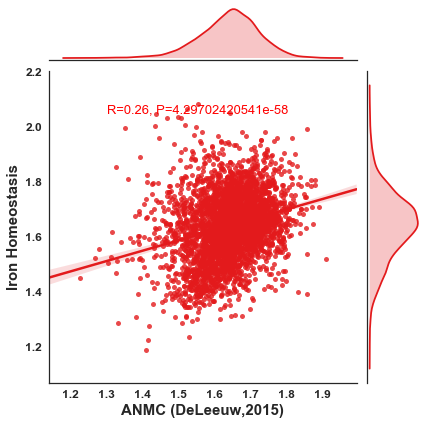

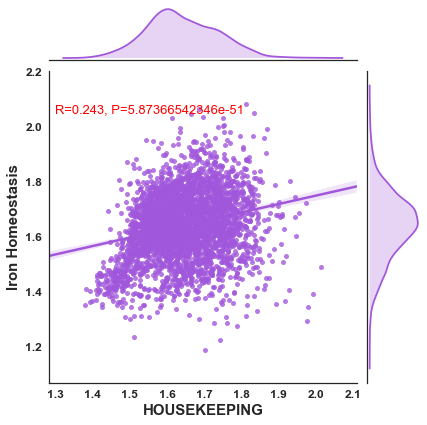

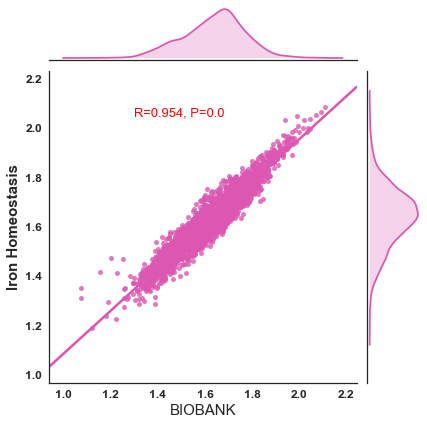

In [6]:
df = df_PC
plot_geneset_correlations(df, 'IRON_D','IRON', cmap = blue, annotate= (1.1,2.05), 
                         label = ['Iron Downreg (Clardy,2006)', 'Iron Homeostasis'], fname = 0)
plot_geneset_correlations(df, 'DA_jellen','IRON', cmap = green, annotate= (1.25,2.05),
                          label = ['Dopamine-related (Jellen,2013)', 'Iron Homeostasis'], fname = 0)
plot_geneset_correlations(df, 'ANMC','IRON', cmap = red, annotate=  (1.3,2.05), 
                          label = ['ANMC (DeLeeuw,2015)', 'Iron Homeostasis'], fname = 0)
plot_geneset_correlations(df, 'HOUSEKEEPING','IRON', cmap = purp, annotate=  (1.3,2.05), 
                          label = ['HOUSEKEEPING', 'Iron Homeostasis'], fname = 0)
plot_geneset_correlations(df, 'BIOBANK','IRON', cmap = purp2, annotate=  (1.3,2.05), 
                          label = ['BIOBANK', 'Iron Homeostasis'], fname = 0)

# Whole Brain - Mean calculated across all-genes all probes

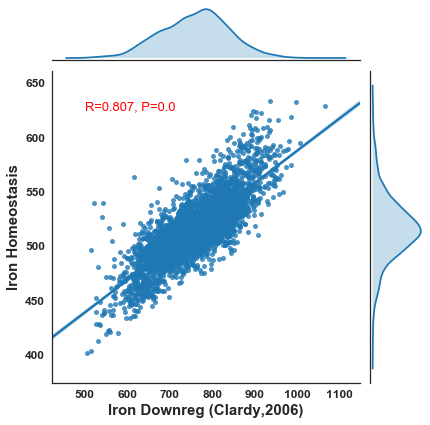

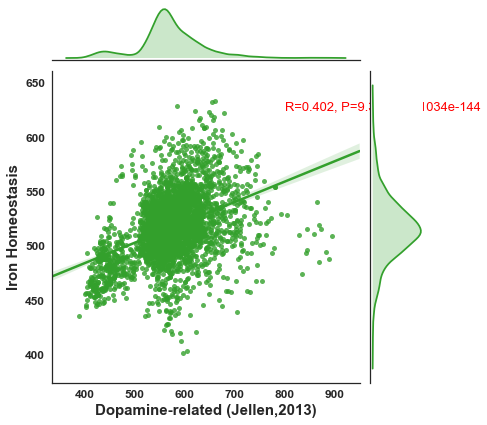

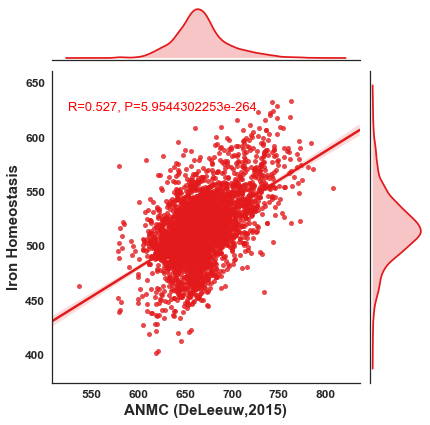

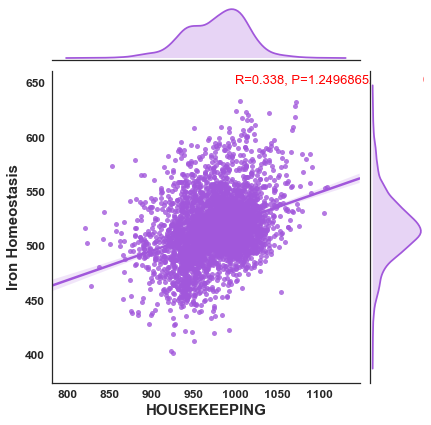

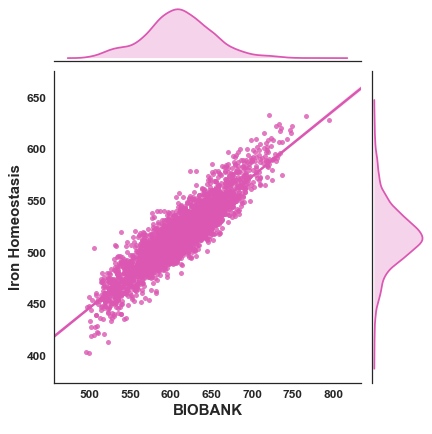

In [7]:
df = df_MU
plot_geneset_correlations(df, 'IRON_D','IRON', cmap = blue, annotate= (500,625), 
                         label = ['Iron Downreg (Clardy,2006)', 'Iron Homeostasis'], fname = 0)
plot_geneset_correlations(df, 'DA_met','IRON', cmap = green, annotate= (800,625),
                          label = ['Dopamine-related (Jellen,2013)', 'Iron Homeostasis'], fname = 0)
plot_geneset_correlations(df, 'ANMC','IRON', cmap = red, annotate=  (525,625), 
                          label = ['ANMC (DeLeeuw,2015)', 'Iron Homeostasis'], fname = 0)
plot_geneset_correlations(df, 'HOUSEKEEPING','IRON', cmap = purp, annotate=  (1000,650), 
                          label = ['HOUSEKEEPING', 'Iron Homeostasis'], fname = 0)
plot_geneset_correlations(df, 'BIOBANK','IRON', cmap = purp2, annotate=  (1.3,2.05), 
                          label = ['BIOBANK', 'Iron Homeostasis'], fname = 0)

# Subcortical 


In [8]:
all_structures_small = set(df.struct.values)

def extract_struct_expression(df, roi, all_structures_small):
    drop_structs = [i for i in all_structures_small if roi not in i]
    df_roi = df[~df['struct'].isin(drop_structs)]
    return df_roi

df = df_MU

df_sn   = extract_struct_expression(df, 'substantia', all_structures_small)
df_rn   = extract_struct_expression(df, 'red', all_structures_small)
df_stn  = extract_struct_expression(df, 'subthalamic', all_structures_small)
df_caud = extract_struct_expression(df, 'caudate', all_structures_small)
df_pall = extract_struct_expression(df, 'pallidus', all_structures_small)
df_puta = extract_struct_expression(df, 'putamen', all_structures_small)
df_subcortical = pd.concat([df_sn,df_rn,df_stn,df_caud,df_pall,df_puta] )
df_subcortical.to_csv(os.path.join(ahba_dir,'AHBA_subcortical.csv'))



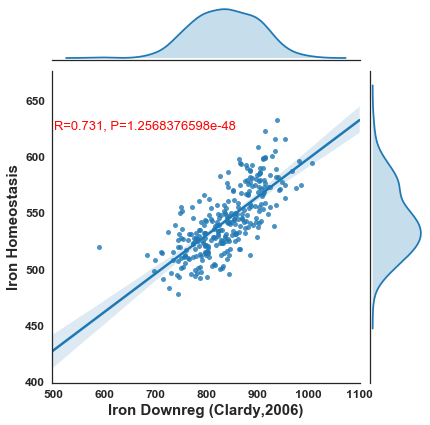

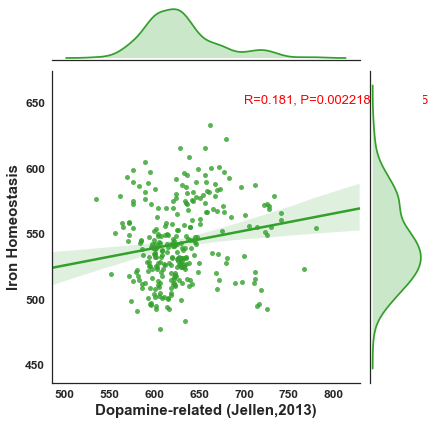

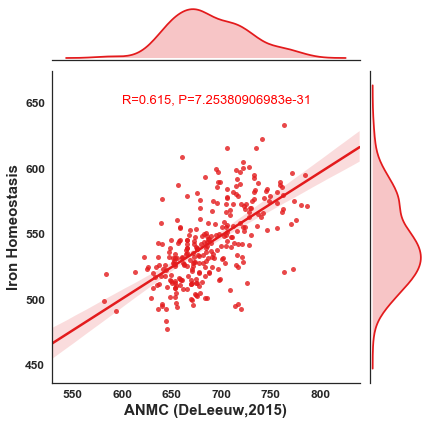

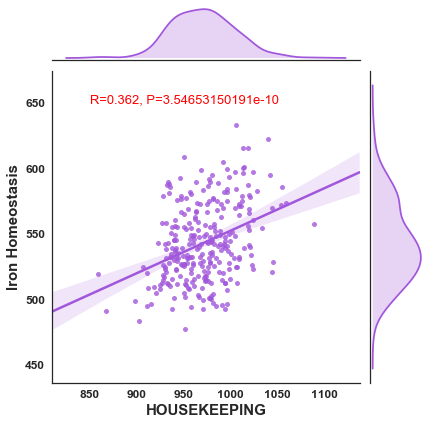

In [9]:
xy = (550,600)

df_subcortical
plot_geneset_correlations(df_subcortical, 'IRON_D','IRON', cmap = blue, annotate= (500,625), 
                         label = ['Iron Downreg (Clardy,2006)', 'Iron Homeostasis'], fname = 0)
plot_geneset_correlations(df_subcortical, 'DA_met','IRON', cmap = green, annotate= (700,650),
                          label = ['Dopamine-related (Jellen,2013)', 'Iron Homeostasis'], fname = 0)
plot_geneset_correlations(df_subcortical, 'ANMC','IRON', cmap = red, annotate=  (600,650), 
                          label = ['ANMC (DeLeeuw,2015)', 'Iron Homeostasis'], fname = 0)
plot_geneset_correlations(df_subcortical, 'HOUSEKEEPING','IRON', cmap = purp, annotate=  (850,650), 
                          label = ['HOUSEKEEPING', 'Iron Homeostasis'], fname = 0)

In [16]:
drop = [ u'coords_native', u'donor_names', u'struct_id', u'struct_name',
       u'top_struct', u'Mean', u'Median', u'PC1','PC2', 'PC3', u'corrected_mni_x',
       u'corrected_mni_y', u'corrected_mni_z']

In [17]:
xIRON = IRON.drop(drop,axis=1)
xIROND = IRON_D.drop(drop,axis=1)
xANMC = ANMC.drop(drop,axis=1)
xBIO = BIOBANK.drop(drop,axis=1)
#xIRON.to_csv('/Users/kanaan/Desktop/iron.csv')
#xANMC.to_csv('/Users/kanaan/Desktop/anmc.csv')
#xBIO.to_csv('/Users/kanaan/Desktop/biobank.csv')

# average probes and save as CSV
probes = [s.split('_')[0] for s in xIRON.T.index.values]
xIRON2 = xIRON.T.groupby(probes).mean().T
xIRON2.to_csv(os.path.join(ahba_dir,'av_IRON.csv'))

# average probes and save as CSV
probes = [s.split('_')[0] for s in xIROND.T.index.values]
xIROND2 = xIROND.T.groupby(probes).mean().T
xIROND2.to_csv(os.path.join(ahba_dir,'av_IRON_D.csv'))


# average probes and save as CSV
probes = [s.split('_')[0] for s in xANMC.T.index.values]
xANMC2 = xANMC.T.groupby(probes).mean().T
xANMC2.to_csv(os.path.join(ahba_dir,'av_ANMC.csv'))



In [38]:
pd.__version__

u'0.19.2'

In [37]:
xANMC.T.groupby(probes).mean()

,1001,1002,1003,1004,1005,1009,1010,1011,1012,1013,...,988,989,99,990,993,994,995,996,997,998
AGL,6.869033,7.013833,6.570333,6.886467,6.908433,6.808733,6.853367,6.893633,6.819633,6.917300,...,6.882867,6.703833,6.991867,7.072267,6.731433,6.965033,6.822100,6.791833,6.913633,7.150633
AKR1B1,7.561900,7.996500,7.748050,7.357700,7.173750,7.559150,7.465900,7.751400,7.054850,7.435350,...,7.499400,7.197250,7.325950,6.818300,7.505650,7.609650,7.172600,7.808950,7.123700,6.807450
ALDH5A1,7.334533,7.772067,7.524933,7.648767,7.625733,7.326000,7.481367,7.453167,7.515567,7.526633,...,7.312600,7.209200,7.848900,8.332333,7.446800,7.529933,7.544667,7.705133,7.484333,8.179700
CPS1,2.094200,2.131233,2.099100,2.259867,1.991767,2.365467,1.850567,2.131533,2.405667,2.094633,...,1.788667,2.039500,1.996100,2.278467,2.204133,2.317733,2.373033,4.264833,2.259533,2.147433
CS,5.252850,5.263900,5.105800,4.998050,5.480150,5.336500,5.326450,4.921300,5.447950,5.309600,...,5.119600,5.272300,4.937850,5.096900,5.179100,5.101000,5.169400,5.265900,5.106750,5.248200
DHTKD1,4.502300,4.776567,4.027233,4.536800,4.445933,3.903300,3.936367,4.076000,4.413533,3.821300,...,4.004467,4.288533,4.262867,4.733233,3.956667,3.853333,4.067833,3.985467,4.007567,4.854133
ENO1,11.251100,11.619750,11.232000,10.999300,10.781650,11.108000,11.283900,11.360800,11.083250,11.101400,...,11.294800,11.062650,10.283400,10.506900,10.818750,10.993900,10.973250,11.423200,10.993050,10.595550
GALM,4.435450,4.825650,4.509350,4.234050,4.305800,4.184150,4.660950,4.354850,4.605050,4.420450,...,4.654950,4.365250,4.157000,4.023600,4.316650,4.490250,3.316100,4.636500,4.584150,4.023300
GBE1,6.123350,6.238500,5.459350,5.707000,5.437900,6.023500,5.998200,5.711800,5.759200,5.941200,...,5.606850,5.526150,5.873200,5.965750,6.304600,6.053850,5.031200,6.629500,6.157350,6.259200
GPT,5.086950,5.049350,3.846500,4.133150,4.689350,4.828000,4.854850,5.046900,4.938350,4.267000,...,4.837500,4.120100,3.808200,5.002050,4.086350,4.871500,4.434550,5.226600,3.911900,4.285700


In [22]:
print [s for s in xBIO.index.values]

[1001, 1002, 1003, 1004, 1005, 1009, 1010, 1011, 1012, 1013, 1017, 1018, 1019, 1020, 1021, 1025, 1026, 1027, 1028, 1029, 1033, 1034, 1035, 1036, 1037, 1041, 1042, 1043, 1044, 1045, 1049, 105, 1050, 1051, 1052, 1053, 1057, 1058, 1059, 106, 1060, 1065, 1066, 1067, 1068, 107, 1073, 1074, 1075, 1076, 1081, 1082, 1083, 1084, 1089, 1090, 1091, 1092, 10964, 10965, 10966, 1097, 10972, 10973, 1098, 10980, 10981, 10988, 10989, 1099, 10996, 10997, 1100, 11004, 11005, 11012, 11013, 11020, 11021, 11028, 11036, 11044, 11045, 1105, 11052, 11053, 1106, 11060, 11061, 11063, 11064, 11065, 11068, 11069, 1107, 11070, 11071, 11072, 11073, 11076, 11077, 11078, 11079, 1108, 11080, 11081, 11084, 11085, 11086, 11087, 11088, 11092, 11095, 11096, 11097, 11100, 11101, 11103, 11104, 11105, 11108, 11109, 11111, 11112, 11113, 11116, 11117, 11119, 11120, 11121, 11124, 11126, 11127, 11128, 11129, 1113, 11132, 11134, 11135, 11136, 1114, 11140, 11141, 11142, 11143, 11144, 11148, 11149, 1115, 11150, 11151, 11156, 1116, 1

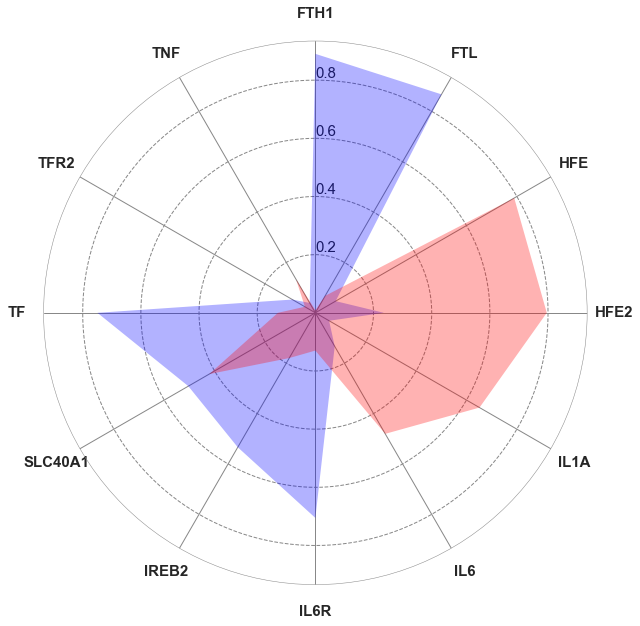

In [10]:
from math import pi
import matplotlib.pyplot as plt

# Set data
loadings = pd.read_csv(os.path.join(ahba_dir,'loadings_IRON.csv'), index_col=0)

loading_index = [i for i in loadings.index]
cat = loading_index
values = list(loadings.PC1) # [90, 60, 65, 70, 40]
values2 = list(loadings.PC2) # [90, 60, 65, 70, 40]
#values3 = list(loadings.PC3) # [90, 60, 65, 70, 40]
#values4 = list(loadings.PC4) # [90, 60, 65, 70, 40]

N = len(cat)
x_as = [n / float(N) * 2 * pi for n in range(N)]

# Because our chart will be circular we need to append a copy of the first 
# value of each list at the end of each list with data
values.append(list(loadings.PC1)[0])
values = np.abs(np.array(values))

values2.append(list(loadings.PC2)[0])
values2 = np.abs(np.array(values2))

#values3.append(list(loadings.PC3)[0])
#values3 = np.abs(np.array(values3))


x_as += x_as[:1]

# Set color of axes
plt.rc('axes', linewidth=0.5, edgecolor="#888888")

# Create polar plot
fig = plt.figure(figsize=(20,20))
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar=True)

# Set clockwise rotation. That is:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

#Set position of y-labels
ax.set_rlabel_position(0)

# Set color and linestyle of grid
ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=1)
ax.yaxis.grid(True, color="#888888", linestyle='dashed', linewidth=1)##888888

# Set number of radial axes and remove labels
plt.xticks(x_as[:-1], loading_index, size = 25,weight='bold')
#plt.xticks(x_as[:-1], [])

# Set yticks
#plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"])

ax.fill(x_as, values, 'b', alpha=0.3)
ax.fill(x_as, values2, 'r', alpha=0.3)
#ax.fill(x_as, values3, 'g', alpha=0.3)
#ax.fill(x_as, values4, 'm', alpha=0.3)

plt.tick_params(axis='y', direction='in', labelsize=15)
plt.tick_params(axis='x', direction='in', labelsize=15)


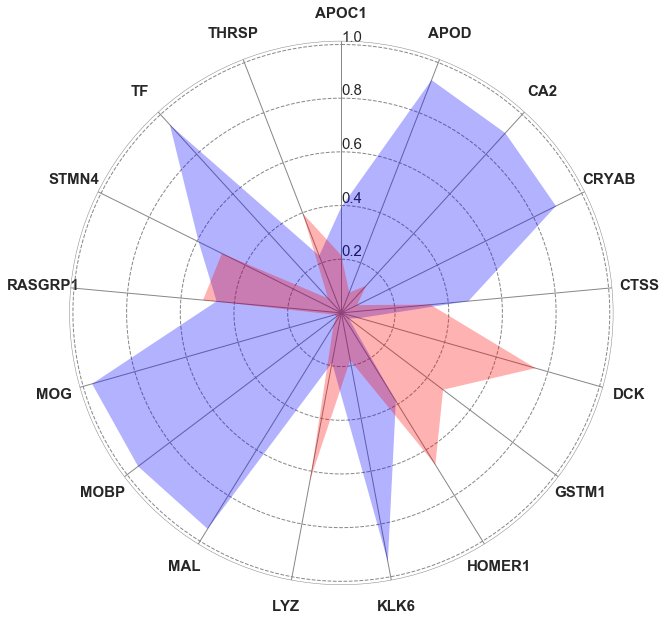

In [9]:
from math import pi
import matplotlib.pyplot as plt

# Set data
loadings = pd.read_csv(os.path.join(ahba_dir,'loadings_IRON_D.csv'), index_col=0)

loading_index = [i for i in loadings.index]
cat = loading_index
values = list(loadings.PC1) # [90, 60, 65, 70, 40]
values2 = list(loadings.PC2) # [90, 60, 65, 70, 40]
#values3 = list(loadings.PC3) # [90, 60, 65, 70, 40]
#values4 = list(loadings.PC4) # [90, 60, 65, 70, 40]

N = len(cat)
x_as = [n / float(N) * 2 * pi for n in range(N)]

# Because our chart will be circular we need to append a copy of the first 
# value of each list at the end of each list with data
values.append(list(loadings.PC1)[0])
values = np.abs(np.array(values))

values2.append(list(loadings.PC2)[0])
values2 = np.abs(np.array(values2))

#values3.append(list(loadings.PC3)[0])
#values3 = np.abs(np.array(values3))


x_as += x_as[:1]

# Set color of axes
plt.rc('axes', linewidth=0.5, edgecolor="#888888")

# Create polar plot
fig = plt.figure(figsize=(20,20))
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar=True)

# Set clockwise rotation. That is:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

#Set position of y-labels
ax.set_rlabel_position(0)

# Set color and linestyle of grid
ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=1)
ax.yaxis.grid(True, color="#888888", linestyle='dashed', linewidth=1)##888888

# Set number of radial axes and remove labels
plt.xticks(x_as[:-1], loading_index, size = 25,weight='bold')
#plt.xticks(x_as[:-1], [])

# Set yticks
#plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"])

ax.fill(x_as, values, 'b', alpha=0.3)
ax.fill(x_as, values2, 'r', alpha=0.3)
#ax.fill(x_as, values3, 'g', alpha=0.3)
#ax.fill(x_as, values4, 'm', alpha=0.3)

plt.tick_params(axis='y', direction='in', labelsize=15)
plt.tick_params(axis='x', direction='in', labelsize=15)

